## TEMPLATE MATCHING TEST CODE

In [ ]:
!apt-get update
!apt install libgl1-mesa-glx -y
!pip install opencv-python --upgrade
!python -m pip install torchvision 

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1027 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [177 kB]
Get:7 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [1636 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [11.3 MB] 
Get:9 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [25.8 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [845 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal/main amd64 Packages [1275 kB]    
Get:12 http://archive.ubuntu.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:13 http://archive.ubuntu.com/ubunt

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Change the **template_image** and the **test_image** using anything the data folder

In [ ]:
template_image='NewLSTemplates/newLS_sat_dot4_lowQ.jpg'
test_image='NewLSTemplates/newLS_drone_highQ.jpg'

img = cv.imread('../Data/'+test_image,0)
img2 = img.copy()
template = cv.imread('../Data/'+template_image,0)
w, h = template.shape[::-1]

In [ ]:
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

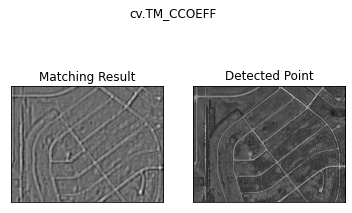

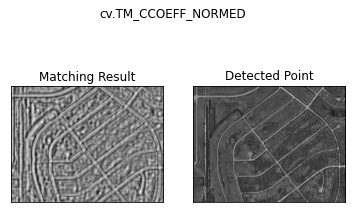

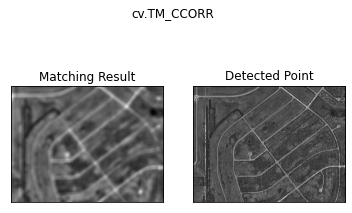

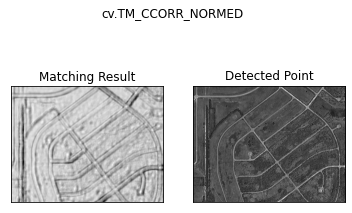

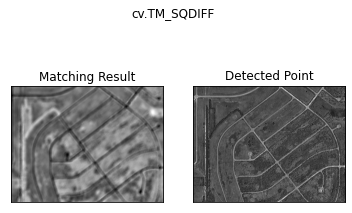

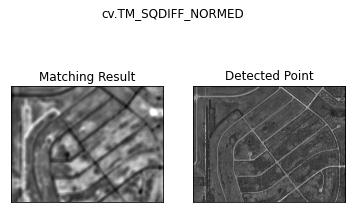

In [ ]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()